In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [30]:
result_loc = "./../../../../Server_results/02_18_2022/"
run_name = "experiment06_02_10_21_36"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [31]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [32]:
q_x.shape

(141, 64, 50)

In [33]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [34]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


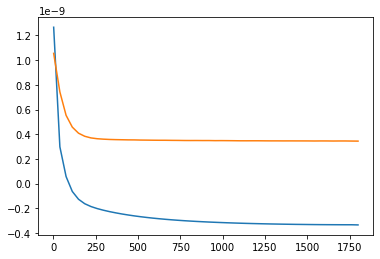

In [35]:
epoch = 121
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


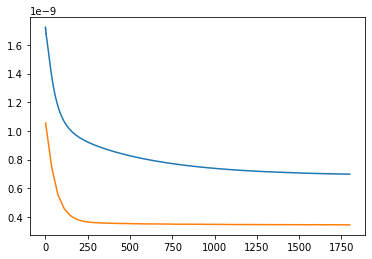

In [44]:
epoch = 0


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

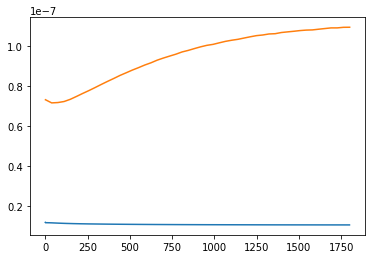

In [42]:
epoch = 1
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(q_MC_x.min(axis=0))
# plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [38]:
p[50,:]

array([6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
      

In [39]:
k_x[50,:,40]

array([1.79877282e-05, 1.23793891e-05, 6.35991314e-06, 4.54007229e-05,
       1.01925032e-05, 1.05540703e-05, 9.70116969e-06, 1.49049174e-05,
       1.57425364e-05, 1.05518136e-05, 6.37243768e-06, 1.85555088e-05,
       9.76538083e-06, 1.05542935e-05, 8.34602160e-06, 1.23770009e-05,
       4.52894838e-05, 4.53688524e-05, 4.52668768e-05, 4.53998716e-05,
       4.52910624e-05, 4.54008044e-05, 4.53989314e-05, 4.53097160e-05,
       4.52523180e-05, 4.53427833e-05, 4.53870220e-05, 4.53013587e-05,
       4.54000089e-05, 4.53988535e-05, 4.53991782e-05, 4.53993036e-05,
       4.53028142e-05, 4.52368570e-05, 4.54007998e-05, 4.53338276e-05,
       4.52912186e-05, 4.52903218e-05, 4.53979770e-05, 4.52350535e-05,
       4.52149270e-05, 4.53653082e-05, 4.53983605e-05, 4.53993954e-05,
       4.53366089e-05, 4.53707116e-05, 4.54009429e-05, 4.54007390e-05,
       4.53980133e-05, 4.53988153e-05, 4.54002549e-05, 4.53025637e-05,
       4.53253360e-05, 4.53050543e-05, 4.53181147e-05, 4.53596094e-05,
      

In [40]:
k_xy[36,:,40]

array([-6.48513723e-06, -2.75854300e-08, -1.75622271e-08, -4.10408970e-08,
       -1.75641344e-08, -2.75857201e-08, -1.75620968e-08, -2.75866535e-08,
       -2.10292714e-06, -2.10050425e-06, -2.10858668e-06, -2.11274510e-06,
       -2.11203078e-06, -2.11065604e-06, -2.10015090e-06, -2.10894765e-06,
       -2.09933308e-06, -2.11700792e-06, -2.11530965e-06, -2.10904150e-06,
       -2.10836011e-06, -2.11118854e-06, -2.11102948e-06, -2.10425164e-06,
       -2.11016304e-06, -2.11482980e-06, -2.11227796e-06, -2.11412192e-06,
       -2.11098042e-06, -2.10643277e-06, -2.10714712e-06, -2.10535491e-06,
       -2.10640266e-06, -2.10245913e-06, -2.10652050e-06, -2.10705861e-06,
       -2.10507912e-06, -2.11277638e-06, -2.11506249e-06, -2.10087408e-06,
       -2.10183645e-06, -2.10962218e-06, -2.11247855e-06, -2.11490631e-06,
       -2.10024462e-06, -2.10776497e-06, -2.10661897e-06, -2.10776374e-06,
       -2.11241898e-06, -2.10801670e-06, -2.11150814e-06, -2.10573255e-06,
       -2.10641086e-06, -

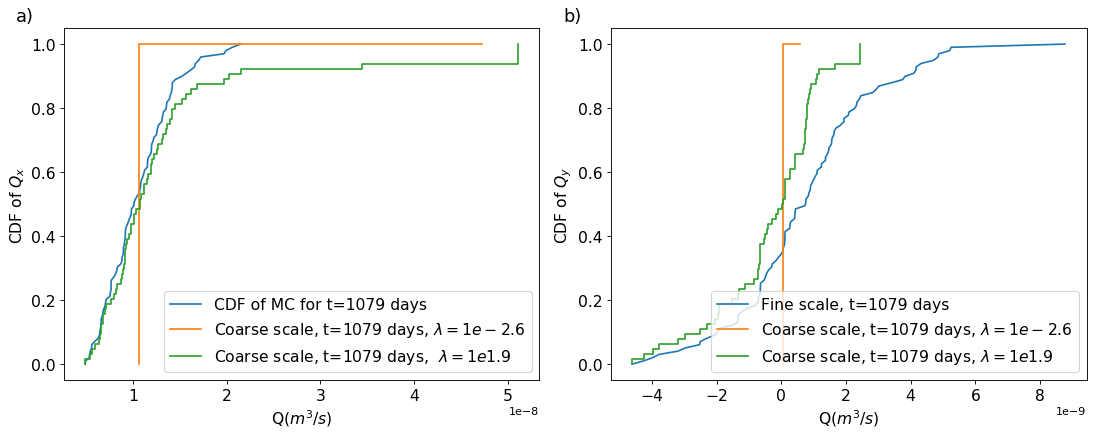

In [49]:
epoch_1 = 10
epoch_2 = 100

time_step = 30


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [18]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [19]:
# b_perc =df_perc


In [46]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [62]:
epoch = 50
t = np.linspace(0,1800,N_steps)

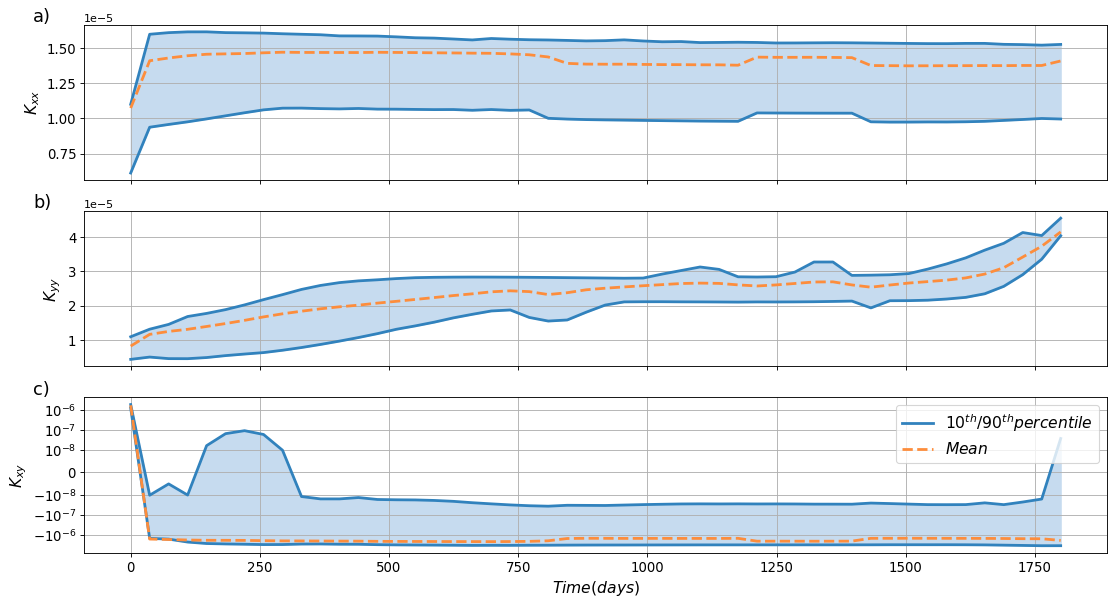

In [63]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [57]:
p[200,:]

IndexError: index 200 is out of bounds for axis 0 with size 141